In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# READ CSV

In [3]:
ratings=pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [4]:
ratings.shape

(25000095, 4)

In [5]:
ratings['rating'].value_counts(dropna=False)


rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

In [6]:
ratings['timestamp'].value_counts(dropna=False)


timestamp
825638400     619
1462647814    256
1490758295    223
1469059264    220
1267135219    202
             ... 
1509297384      1
1509298180      1
1509301986      1
1509314929      1
1240952515      1
Name: count, Length: 20115267, dtype: int64

In [7]:
ratings['userId'].value_counts(dropna=False)


userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: count, Length: 162541, dtype: int64

In [8]:
ratings['rating'].value_counts(dropna=False)


rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

In [9]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [11]:
genome_scores=pd.read_csv("genome-scores.csv")
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [12]:
genome_scores.shape

(15584448, 3)

In [13]:
genome_tags=pd.read_csv("genome-tags.csv")
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [14]:
genome_tags.shape

(1128, 2)

In [15]:
links=pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
links.shape

(62423, 3)

In [17]:
movies=pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [18]:
movies[movies["movieId"]==296]

,movieId,title,genres
292,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [19]:
movies.shape

(62423, 3)

In [20]:
tags=pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [21]:
tags.shape

(1093360, 4)

In [22]:
tags['userId'].value_counts(dropna=False)


userId
6550      183356
21096      20317
62199      13700
160540     12076
155146     11445
           ...  
113150         1
142492         1
142514         1
30775          1
143145         1
Name: count, Length: 14592, dtype: int64

In [23]:
tags['tag'].value_counts(dropna=False)


tag
sci-fi              8330
atmospheric         6516
action              5907
comedy              5702
surreal             5326
                    ... 
teen sleuth            1
evil twins             1
paternity test         1
QVC                    1
cornetto triolgy       1
Name: count, Length: 73051, dtype: int64

# Merge movies and ratings


In [24]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

# Display column names for both dataframes
print("Columns in ratings:", ratings.columns)
print("Columns in movies:", movies.columns)

# Merge the two dataframes on the 'movieId' column
df = pd.merge(ratings, movies, on='movieId')

# Display the merged dataframe
df.head()


Columns in ratings: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Columns in movies: Index(['movieId', 'title', 'genres'], dtype='object')


,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [25]:
df 

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [26]:
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

# Visualization  

In [27]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [28]:
# want to see which genre are the most rated 

In [29]:
count = pd.DataFrame(df.groupby('genres')['rating'].count())
count=count.loc[(count['rating'] >= 1000)]
count

,rating
genres,
(no genres listed),26627
Action,42276
Action|Adventure,143289
Action|Adventure|Animation,7652
Action|Adventure|Animation|Children,9269
...,...
Sci-Fi|Thriller,36081
Sci-Fi|Thriller|IMAX,2393
Thriller,178943


In [30]:
df_filtred=pd.merge(count, df, on='genres')
df_filtred

,genres,rating_x,userId,movieId,rating_y,timestamp,title
0,(no genres listed),26627,3,122896,3.5,1566091420,Pirates of the Caribbean: Dead Men Tell No Tal...
1,(no genres listed),26627,402,122896,3.5,1556877427,Pirates of the Caribbean: Dead Men Tell No Tal...
2,(no genres listed),26627,606,122896,4.5,1515812455,Pirates of the Caribbean: Dead Men Tell No Tal...
3,(no genres listed),26627,967,122896,3.5,1517796699,Pirates of the Caribbean: Dead Men Tell No Tal...
4,(no genres listed),26627,997,122896,2.5,1529263706,Pirates of the Caribbean: Dead Men Tell No Tal...
...,...,...,...,...,...,...,...
24877144,Western,45049,148457,118770,2.5,1418345959,Wild Heritage (1958)
24877145,Western,45049,149183,112395,3.0,1403709891,Belle Starr (1941)
24877146,Western,45049,151289,117302,2.0,1564433780,Denver and Rio Grande (1952)
24877147,Western,45049,156183,157719,2.0,1510532967,Overland Pacific (1954)


In [31]:
df_mean_rating = pd.DataFrame(df_filtred.groupby('genres')['rating_y'].mean())
df_mean_rating

,rating_y
genres,
(no genres listed),3.326379
Action,2.942047
Action|Adventure,3.696463
Action|Adventure|Animation,3.657475
Action|Adventure|Animation|Children,3.576492
...,...
Sci-Fi|Thriller,3.243438
Sci-Fi|Thriller|IMAX,3.465942
Thriller,3.519143


In [32]:
df_mean_rating=df_mean_rating.sort_values(by=['rating_y'],ascending=False)
df_mean_rating

,rating_y
genres,
Action|Adventure|Mystery|Romance|Thriller,4.196617
Film-Noir|Romance|Thriller,4.161201
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,4.155508
Adventure|Animation|Fantasy,4.153862
Action|Adventure|Crime|Drama|Thriller,4.153175
...,...
Action|Adventure|Children|Drama,2.193946
Action|Children|Comedy,2.112771
Action|Adventure|Children|Comedy|Fantasy|Sci-Fi,2.078523


In [33]:
genre_rating=pd.merge(count, df_mean_rating, on='genres')


In [34]:
genre_rating = genre_rating.rename(columns={'rating': 'num_of_ratings','rating_y':'mean_rating'})
genre_rating

,num_of_ratings,mean_rating
genres,,
(no genres listed),26627,3.326379
Action,42276,2.942047
Action|Adventure,143289,3.696463
Action|Adventure|Animation,7652,3.657475
Action|Adventure|Animation|Children,9269,3.576492
...,...,...
Sci-Fi|Thriller,36081,3.243438
Sci-Fi|Thriller|IMAX,2393,3.465942
Thriller,178943,3.519143


In [35]:
genre_rating=genre_rating.sort_values(by=['mean_rating'],ascending=False)


In [36]:
#the most rated genres

In [37]:
genre_rating_loc=genre_rating.iloc[:10]
genre_rating_loc

,num_of_ratings,mean_rating
genres,,
Action|Adventure|Mystery|Romance|Thriller,16850,4.196617
Film-Noir|Romance|Thriller,5062,4.161201
Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,38895,4.155508
Adventure|Animation|Fantasy,24132,4.153862
Action|Adventure|Crime|Drama|Thriller,20444,4.153175
Film-Noir|Mystery,12335,4.148480
Animation|Children|Drama|Fantasy,9375,4.148000
Action|Crime|Drama|IMAX,42189,4.147029
Action|Adventure|Comedy|Fantasy|Romance,38096,4.124003


# Group title and rating

In [38]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()


title
Forrest Gump (1994)                 81491
Shawshank Redemption, The (1994)    81482
Pulp Fiction (1994)                 79672
Silence of the Lambs, The (1991)    74127
Matrix, The (1999)                  72674
Name: rating, dtype: int64

In [39]:
ratings_ = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.896648
#1 Cheerleader Camp (2010),2.111111
#Captured (2017),3.750000
#Female Pleasure (2018),3.666667


In [40]:
ratings_['number_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_.head()

,rating,number_of_ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3


<Axes: >

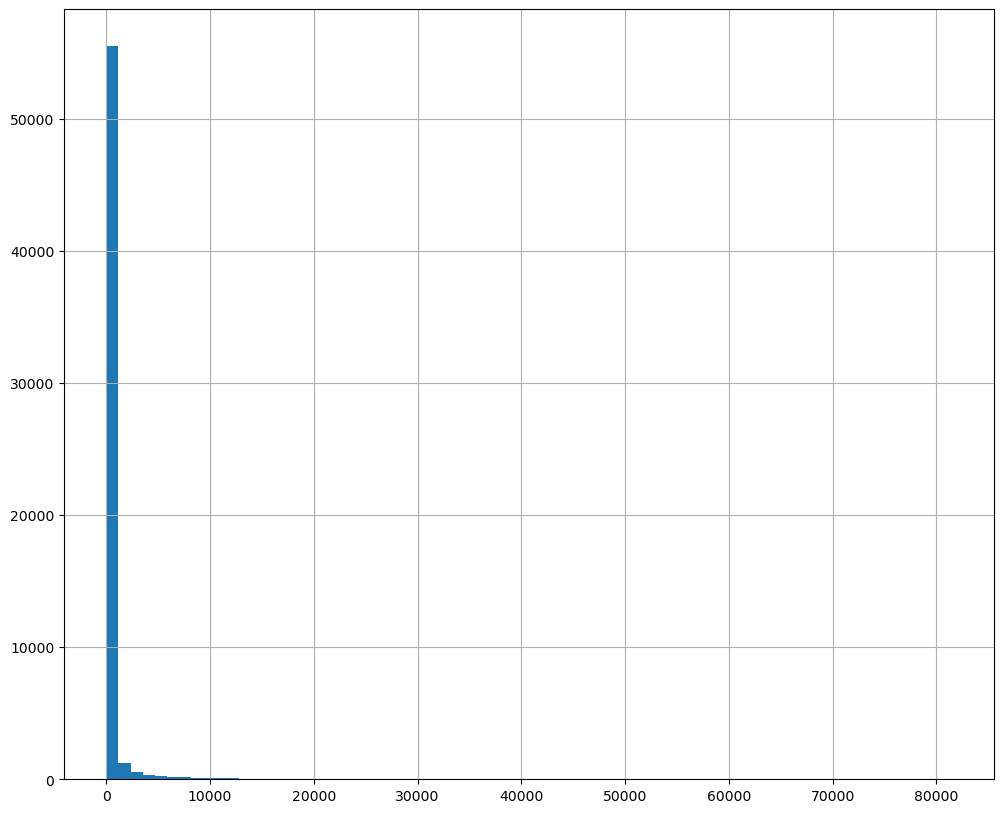

In [41]:
plt.figure(figsize=(12,10))
ratings_['number_of_ratings'].hist(bins=70)

In [42]:
ratings_.reset_index(inplace=True)

In [43]:
ratings_.columns

Index(['title', 'rating', 'number_of_ratings'], dtype='object')

In [44]:
ratings1=pd.DataFrame()
ratings1["title"]=ratings_["title"]
ratings1["rating"]=ratings_["rating"]

ratings1

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000
1,"""Great Performances"" Cats (1998)",2.896648
2,#1 Cheerleader Camp (2010),2.111111
3,#Captured (2017),3.750000
4,#Female Pleasure (2018),3.666667
...,...,...
58953,…And the Fifth Horseman Is Fear (1965),3.250000
58954,キサラギ (2007),3.250000
58955,チェブラーシカ (2010),3.166667
58956,貞子3D (2012),2.375000


<Axes: >

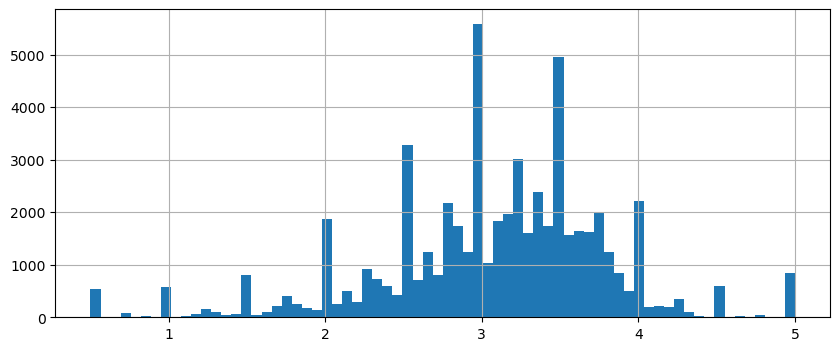

In [45]:
plt.figure(figsize=(10,4))
ratings_['rating'].hist(bins=70)

# The average rating and the number of ratings per movies

In [46]:
df1 =ratings_.sort_values('number_of_ratings',ascending=False).reset_index(drop=True)
df1

,title,rating,number_of_ratings
0,Forrest Gump (1994),4.048011,81491
1,"Shawshank Redemption, The (1994)",4.413576,81482
2,Pulp Fiction (1994),4.188912,79672
3,"Silence of the Lambs, The (1991)",4.151342,74127
4,"Matrix, The (1999)",4.154099,72674
...,...,...,...
58953,Kojot (2017),4.000000,1
58954,Kochavva Paulo Ayyappa Coelho (2016),3.000000,1
58955,Knuckleface Jones (1999),0.500000,1
58956,The Lodge (2019),0.500000,1


In [47]:
df1.shape

(58958, 3)

# Top 10 movies rated

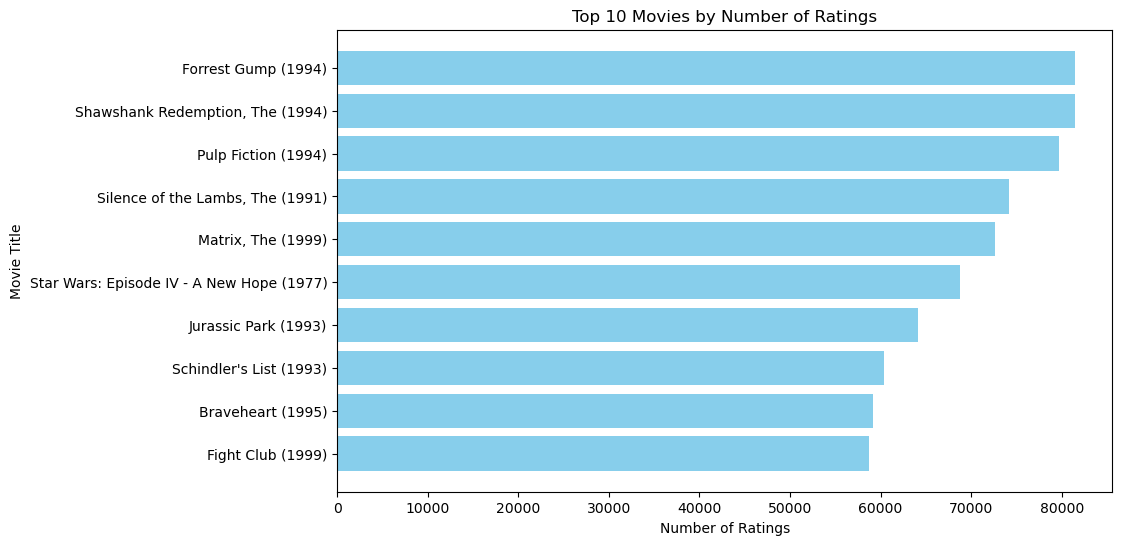

In [48]:
top_10 = df1.sort_values('number_of_ratings', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_10['title'], top_10['number_of_ratings'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies by Number of Ratings')
plt.gca().invert_yaxis()  
plt.show()


In [49]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [50]:
ratings1

,title,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000
1,"""Great Performances"" Cats (1998)",2.896648
2,#1 Cheerleader Camp (2010),2.111111
3,#Captured (2017),3.750000
4,#Female Pleasure (2018),3.666667
...,...,...
58953,…And the Fifth Horseman Is Fear (1965),3.250000
58954,キサラギ (2007),3.250000
58955,チェブラーシカ (2010),3.166667
58956,貞子3D (2012),2.375000


In [51]:
# I want to have the average the rating in my new DataFrame

In [52]:

combined_df = pd.merge(df, ratings1, on='title', how='right')

# Display the combined dataframe
combined_df


,userId,movieId,rating_x,timestamp,title,genres,rating_y
0,134530,208297,3.0,1572788951,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama,3.000000
1,1262,51372,4.5,1314846144,"""Great Performances"" Cats (1998)",Musical,2.896648
2,1282,51372,4.5,1280854031,"""Great Performances"" Cats (1998)",Musical,2.896648
3,1793,51372,4.0,1365685560,"""Great Performances"" Cats (1998)",Musical,2.896648
4,1833,51372,3.0,1231042502,"""Great Performances"" Cats (1998)",Musical,2.896648
...,...,...,...,...,...,...,...
25000090,75309,130640,5.0,1558738199,貞子3D (2012),Horror,2.375000
25000091,103611,130640,3.5,1504136599,貞子3D (2012),Horror,2.375000
25000092,109090,130640,3.0,1536273435,貞子3D (2012),Horror,2.375000
25000093,65679,157314,5.0,1461315340,줄탁동시 (2012),(no genres listed),4.000000


In [53]:
title_df=df.groupby("title").agg(pd.Series.mode)

In [54]:
title_df.reset_index(inplace=True)

In [55]:
title_df

,title,userId,movieId,rating,timestamp,genres
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",134530,208297,3.0,1572788951,Documentary|Drama
1,"""Great Performances"" Cats (1998)","[1262, 1282, 1793, 1833, 2056, 3364, 3691, 386...",51372,3.0,"[1228344914, 1228573051, 1228943006, 122931711...",Musical
2,#1 Cheerleader Camp (2010),"[29288, 39905, 41445, 47153, 80976, 85034, 965...",136604,"[1.0, 2.0, 4.0]","[1435908104, 1445026166, 1471008648, 148445086...",Comedy|Drama
3,#Captured (2017),"[71839, 75309]",183901,"[2.5, 5.0]","[1525725089, 1558738318]",Horror
4,#Female Pleasure (2018),"[21007, 72315, 136230]",195955,3.5,"[1566166246, 1567584204, 1570139090]",Documentary
...,...,...,...,...,...,...
58953,…And the Fifth Horseman Is Fear (1965),"[72315, 77506]",159678,"[3.0, 3.5]","[1464734469, 1466175152]",Drama|War
58954,キサラギ (2007),"[72315, 102072]",132604,"[3.0, 3.5]","[1455274857, 1499687951]",Comedy|Mystery
58955,チェブラーシカ (2010),"[15732, 21188, 25925, 53837, 72315, 82841, 101...",132319,3.5,"[1486337575, 1494519971, 1502126418, 151403610...",Animation|Children
58956,貞子3D (2012),"[36618, 41404, 52120, 58933, 71265, 71897, 723...",130640,"[0.5, 1.0, 4.0]","[1427122911, 1434900243, 1450164194, 146396618...",Horror


In [56]:
new_title_df=pd.DataFrame()
new_title_df["title"]=title_df["title"]
new_title_df["genres"]=title_df["genres"]
new_title_df

,title,genres
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama
1,"""Great Performances"" Cats (1998)",Musical
2,#1 Cheerleader Camp (2010),Comedy|Drama
3,#Captured (2017),Horror
4,#Female Pleasure (2018),Documentary
...,...,...
58953,…And the Fifth Horseman Is Fear (1965),Drama|War
58954,キサラギ (2007),Comedy|Mystery
58955,チェブラーシカ (2010),Animation|Children
58956,貞子3D (2012),Horror


In [57]:

# Assuming df1 is the first dataframe and df2 is the second dataframe
# Merge dataframes on the 'title' column
films = pd.merge(new_title_df, ratings1, on='title', how='right')

# Display the combined dataframe
films

,title,genres,rating
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama,3.000000
1,"""Great Performances"" Cats (1998)",Musical,2.896648
2,#1 Cheerleader Camp (2010),Comedy|Drama,2.111111
3,#Captured (2017),Horror,3.750000
4,#Female Pleasure (2018),Documentary,3.666667
...,...,...,...
58953,…And the Fifth Horseman Is Fear (1965),Drama|War,3.250000
58954,キサラギ (2007),Comedy|Mystery,3.250000
58955,チェブラーシカ (2010),Animation|Children,3.166667
58956,貞子3D (2012),Horror,2.375000


In [58]:
# Extracting the year from the title using regular expressions


In [59]:
import re
films = pd.DataFrame(films)

films['year'] = films['title'].str.extract(r'\((\d{4})\)')

films

,title,genres,rating,year
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",Documentary|Drama,3.000000,1983
1,"""Great Performances"" Cats (1998)",Musical,2.896648,1998
2,#1 Cheerleader Camp (2010),Comedy|Drama,2.111111,2010
3,#Captured (2017),Horror,3.750000,2017
4,#Female Pleasure (2018),Documentary,3.666667,2018
...,...,...,...,...
58953,…And the Fifth Horseman Is Fear (1965),Drama|War,3.250000,1965
58954,キサラギ (2007),Comedy|Mystery,3.250000,2007
58955,チェブラーシカ (2010),Animation|Children,3.166667,2010
58956,貞子3D (2012),Horror,2.375000,2012


In [60]:
films["title"]

0        "BLOW THE NIGHT!" Let's Spend the Night Togeth...
1                         "Great Performances" Cats (1998)
2                               #1 Cheerleader Camp (2010)
3                                         #Captured (2017)
4                                  #Female Pleasure (2018)
                               ...                        
58953               …And the Fifth Horseman Is Fear (1965)
58954                                          キサラギ (2007)
58955                                       チェブラーシカ (2010)
58956                                          貞子3D (2012)
58957                                          줄탁동시 (2012)
Name: title, Length: 58958, dtype: object

In [61]:
#remove year from title

In [62]:
import pandas as pd

def remove_year(title):
    return title.str.replace(r' \(\d{4}\)', '', regex=True)

films["title"] = remove_year(films["title"])

films


,title,genres,rating,year
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together",Documentary|Drama,3.000000,1983
1,"""Great Performances"" Cats",Musical,2.896648,1998
2,#1 Cheerleader Camp,Comedy|Drama,2.111111,2010
3,#Captured,Horror,3.750000,2017
4,#Female Pleasure,Documentary,3.666667,2018
...,...,...,...,...
58953,…And the Fifth Horseman Is Fear,Drama|War,3.250000,1965
58954,キサラギ,Comedy|Mystery,3.250000,2007
58955,チェブラーシカ,Animation|Children,3.166667,2010
58956,貞子3D,Horror,2.375000,2012


In [63]:
df1["title"] = remove_year(df1["title"])
df1

,title,rating,number_of_ratings
0,Forrest Gump,4.048011,81491
1,"Shawshank Redemption, The",4.413576,81482
2,Pulp Fiction,4.188912,79672
3,"Silence of the Lambs, The",4.151342,74127
4,"Matrix, The",4.154099,72674
...,...,...,...
58953,Kojot,4.000000,1
58954,Kochavva Paulo Ayyappa Coelho,3.000000,1
58955,Knuckleface Jones,0.500000,1
58956,The Lodge,0.500000,1


In [64]:
films1 = pd.DataFrame(films['genres'])
films1.head()

,genres
0,Documentary|Drama
1,Musical
2,Comedy|Drama
3,Horror
4,Documentary


In [65]:
films1['genres'] = films1['genres'].str.split('|')

In [66]:
films1.head()

,genres
0,"[Documentary, Drama]"
1,[Musical]
2,"[Comedy, Drama]"
3,[Horror]
4,[Documentary]


In [67]:
# seperate the different genres in a new DataFrame

In [68]:
films1=films1.drop('genres',axis=1).join(films1.genres.str.join('|').str.get_dummies())
films1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
58954,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
58955,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58956,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [69]:
cinema = pd.concat([films, films1], axis=1)

# Display the merged DataFrame
cinema.head()

,title,genres,rating,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together",Documentary|Drama,3.000000,1983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""Great Performances"" Cats",Musical,2.896648,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,#1 Cheerleader Camp,Comedy|Drama,2.111111,2010,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,#Captured,Horror,3.750000,2017,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,#Female Pleasure,Documentary,3.666667,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
cinema.shape

(58958, 24)

In [71]:
df1.head()

,title,rating,number_of_ratings
0,Forrest Gump,4.048011,81491
1,"Shawshank Redemption, The",4.413576,81482
2,Pulp Fiction,4.188912,79672
3,"Silence of the Lambs, The",4.151342,74127
4,"Matrix, The",4.154099,72674


In [72]:
cinema=cinema.sort_values(by="title")

In [73]:
df1=df1.sort_values(by="title")

In [74]:
cinema

,title,genres,rating,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together",Documentary|Drama,3.000000,1983,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""Great Performances"" Cats",Musical,2.896648,1998,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,#1 Cheerleader Camp,Comedy|Drama,2.111111,2010,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,#Captured,Horror,3.750000,2017,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,#Female Pleasure,Documentary,3.666667,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,…And the Fifth Horseman Is Fear,Drama|War,3.250000,1965,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58954,キサラギ,Comedy|Mystery,3.250000,2007,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
58955,チェブラーシカ,Animation|Children,3.166667,2010,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
58956,貞子3D,Horror,2.375000,2012,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [75]:
df1=df1.reset_index(drop=True)
df1

,title,rating,number_of_ratings
0,"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000,1
1,"""Great Performances"" Cats",2.896648,179
2,#1 Cheerleader Camp,2.111111,9
3,#Captured,3.750000,2
4,#Female Pleasure,3.666667,3
...,...,...,...
58953,…And the Fifth Horseman Is Fear,3.250000,2
58954,キサラギ,3.250000,2
58955,チェブラーシカ,3.166667,9
58956,貞子3D,2.375000,12


In [76]:
cinemas=pd.concat([df1["number_of_ratings"],cinema],axis=1)
cinemas

,number_of_ratings,title,genres,rating,year,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,"""BLOW THE NIGHT!"" Let's Spend the Night Together",Documentary|Drama,3.000000,1983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,179,"""Great Performances"" Cats",Musical,2.896648,1998,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,9,#1 Cheerleader Camp,Comedy|Drama,2.111111,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,#Captured,Horror,3.750000,2017,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,#Female Pleasure,Documentary,3.666667,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,2,…And the Fifth Horseman Is Fear,Drama|War,3.250000,1965,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58954,2,キサラギ,Comedy|Mystery,3.250000,2007,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
58955,9,チェブラーシカ,Animation|Children,3.166667,2010,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
58956,12,貞子3D,Horror,2.375000,2012,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [77]:
cinemas.drop["title"]

TypeError: 'method' object is not subscriptable

In [78]:
# Assuming merged_df is your DataFrame
column_names = cinemas.columns

# Print all column names
print(column_names)


Index(['number_of_ratings', 'title', 'genres', 'rating', 'year',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [79]:
# the important features for my cluster

In [80]:
X = cinemas[['year','rating','number_of_ratings', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
X.head()

,year,rating,number_of_ratings,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1983,3.000000,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1998,2.896648,179,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,2.111111,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,3.750000,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,3.666667,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# check NaN Values

In [82]:
X.isna().sum()

year                 372
rating                 0
number_of_ratings      0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
dtype: int64

In [83]:
X["year"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        1983
1        1998
2        2010
3        2017
4        2018
         ... 
58953    1965
58954    2007
58955    2010
58956    2012
58957    2012
Name: year, Length: 58958, dtype: object>

In [84]:
#Fill NaN value with the mean

In [85]:
X['year'] = X['year'].fillna("1983")
X['year'].isna().sum()

C:\Users\Alex\AppData\Local\Temp\ipykernel_127756\1896626002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['year'] = X['year'].fillna("1983")


0

In [87]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
X_scaled = pd.DataFrame(X_prep,columns=X.columns)
X_scaled.head()

,year,rating,number_of_ratings,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.408495,-0.096540,-0.170597,-0.364216,-0.26483,-0.227818,-0.225875,-0.611104,-0.304974,3.135585,...,-0.077167,-0.328164,-0.057606,-0.132485,-0.222495,-0.375771,-0.25099,-0.404975,-0.175876,-0.141419
1,0.197555,-0.236286,-0.098814,-0.364216,-0.26483,-0.227818,-0.225875,-0.611104,-0.304974,-0.318920,...,-0.077167,-0.328164,-0.057606,7.548011,-0.222495,-0.375771,-0.25099,-0.404975,-0.175876,-0.141419
2,0.682394,-1.298439,-0.167370,-0.364216,-0.26483,-0.227818,-0.225875,1.636383,-0.304974,-0.318920,...,-0.077167,-0.328164,-0.057606,-0.132485,-0.222495,-0.375771,-0.25099,-0.404975,-0.175876,-0.141419
3,0.965217,0.917562,-0.170193,-0.364216,-0.26483,-0.227818,-0.225875,-0.611104,-0.304974,-0.318920,...,-0.077167,3.047255,-0.057606,-0.132485,-0.222495,-0.375771,-0.25099,-0.404975,-0.175876,-0.141419
4,1.005620,0.804884,-0.169790,-0.364216,-0.26483,-0.227818,-0.225875,-0.611104,-0.304974,3.135585,...,-0.077167,-0.328164,-0.057606,-0.132485,-0.222495,-0.375771,-0.25099,-0.404975,-0.175876,-0.141419


In [88]:
X

,year,rating,number_of_ratings,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1983,3.000000,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1998,2.896648,179,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,2.111111,9,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,3.750000,2,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2018,3.666667,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,1965,3.250000,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
58954,2007,3.250000,2,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
58955,2010,3.166667,9,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58956,2012,2.375000,12,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [89]:
X["year"].isna().sum()

0

# KMeans model

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_scaled)

C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=1234)

In [91]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_scaled)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     5539
1     4827
2     2939
3     2626
4     5250
5    22251
6    12295
7     1155
8     1727
9      349
Name: count, dtype: int64

In [92]:
kmeans.inertia_ 

755080.2906554126

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

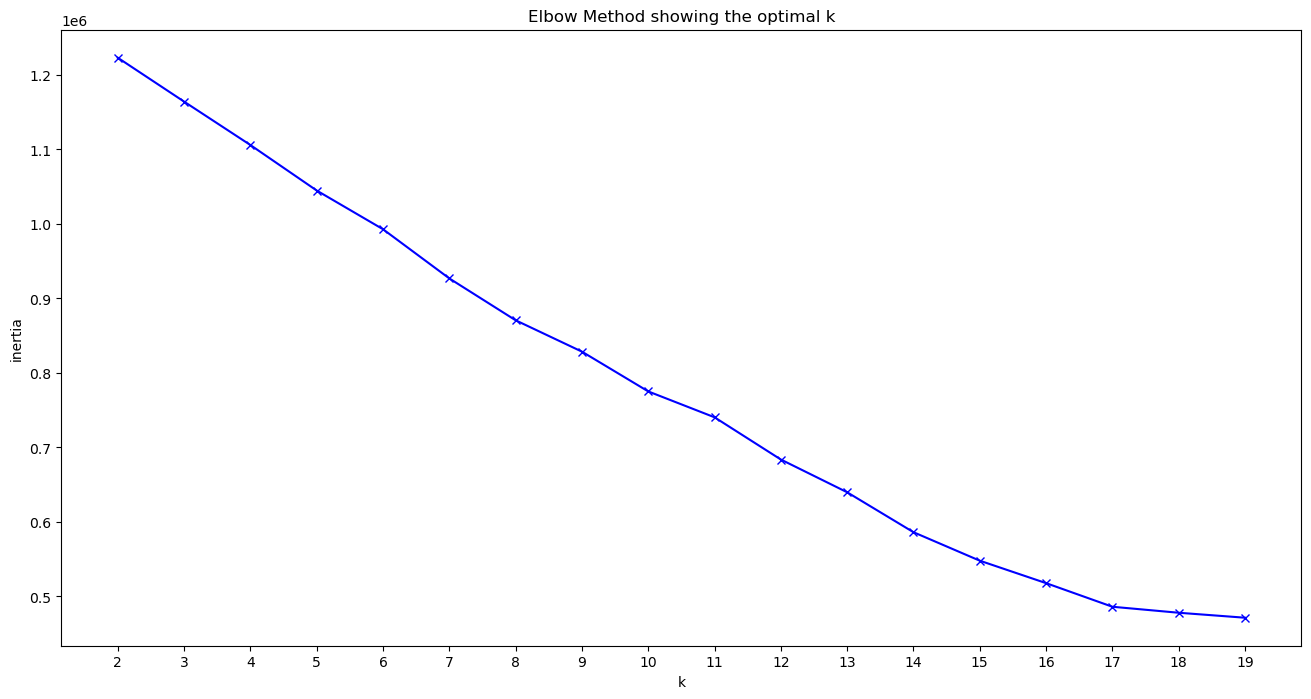

In [93]:
import numpy as np
from sklearn.cluster import KMeans

K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,n_init="auto",
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,n_init="auto",
                    random_state=1234)
    kmeans.fit(X_scaled)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [94]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, random_state=1234).fit(X_scaled)
clusters = kmeans.predict(X_scaled)
pd.Series(clusters).value_counts().sort_index()

C:\Users\Alex\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0     15600
1      5425
2      2644
3      1709
4       349
5      2572
6      5060
7      1003
8      3039
9      8112
10      195
11     3841
12     1784
13     1131
14     3730
15     2764
Name: count, dtype: int64

In [95]:
#Add new column cluster

In [96]:
cinemas["cluster"]=clusters
cinemas


,number_of_ratings,title,genres,rating,year,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,1,"""BLOW THE NIGHT!"" Let's Spend the Night Together",Documentary|Drama,3.000000,1983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,179,"""Great Performances"" Cats",Musical,2.896648,1998,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
2,9,#1 Cheerleader Camp,Comedy|Drama,2.111111,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,2,#Captured,Horror,3.750000,2017,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11
4,3,#Female Pleasure,Documentary,3.666667,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,2,…And the Fifth Horseman Is Fear,Drama|War,3.250000,1965,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
58954,2,キサラギ,Comedy|Mystery,3.250000,2007,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
58955,9,チェブラーシカ,Animation|Children,3.166667,2010,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
58956,12,貞子3D,Horror,2.375000,2012,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11


In [97]:
list(cinema['title'])

['"BLOW THE NIGHT!" Let\'s Spend the Night Together',
 '"Great Performances" Cats',
 '#1 Cheerleader Camp',
 '#Captured',
 '#Female Pleasure',
 '#FollowMe',
 '#Horror',
 '#Lucky Number',
 '#SCREAMERS',
 '#SquadGoals',
 '#Stuck',
 '#realityhigh',
 '$ (Dollars)',
 '$1,000 on the Black',
 '$100,000 for Ringo',
 '$5 a Day',
 '$50K and a Call Girl: A Love Story',
 '$9.99',
 '$ellebrity (Sellebrity)',
 "$uperthief: Inside America's Biggest Bank Score",
 "'49-'17",
 "'63 Boycott",
 "'68",
 "'71",
 "'Gator Bait",
 "'Hellboy': The Seeds of Creation",
 "'Human' Factor, The (Human Factor, The)",
 "'Master Harold' ... And the Boys",
 "'Master Harold'... and the Boys",
 "'Neath Brooklyn Bridge",
 "'Neath the Arizona Skies",
 "'Pimpernel' Smith",
 "'R Xmas",
 "'Round Midnight",
 "'Salem's Lot",
 "'Til Madness Do Us Part",
 "'Til There Was You",
 "'Tis the Season for Love",
 "'Twas the Night",
 "'Twas the Night Before Christmas",
 "'burbs, The",
 "'night Mother",
 '(500) Days of Summer',
 '(A)sexual'

# Find a movie in the same cluster

In [98]:
import random 

# Take movie input from the user
new_movie = input("Enter movie: ")

if new_movie in list(cinemas['title']):
    # Find the cluster number of the input movie
    movie_cluster = cinemas.loc[cinemas['title'] == new_movie, 'cluster'].iloc[0]
    
    # Select a random movie from the same cluster
    recommended_movie = cinemas[cinemas['cluster'] == movie_cluster].sample()['title'].values[0]
    
    print("Recommended movie:", recommended_movie)
else:
    print('No Recommendation') # Input a movie return the cluster number


Enter movie: BATMAN
No Recommendation


# Fetch movie recommanded details from TMDb

In [99]:
import requests

# Assume you have a DataFrame named 'cinemas' containing movie titles and clusters

# Function to fetch movie details from TMDb
def get_movie_details(movie_title, api_key):
    # Base URL for TMDb API
    base_url = "https://api.themoviedb.org/3/search/movie"
    
    # Parameters for the request
    params = {
        "api_key": api_key,
        "query": movie_title
    }
    
    # Send GET request to TMDb API
    response = requests.get(base_url, params=params)
    
    # Check if request was successful
    if response.status_code == 200:
        # Parse the response JSON
        results = response.json()["results"]
        
        # Check if there are any results
        if results:
            # Get the first result (most relevant)
            movie_details = results[0]
            return movie_details
        else:
            return None
    else:
        print("Error fetching movie details:", response.status_code)
        return None

# Function to recommend a movie and redirect to its TMDb details
def recommend_movie(new_movie, cinemas, api_key):
    new_movie = new_movie.lower()  # Convert input movie title to lowercase
    
    # Convert titles in cinemas DataFrame to lowercase for case-insensitive comparison
    cinemas['title'] = cinemas['title'].str.lower()
    
    if new_movie in cinemas['title'].values:
        # Find the cluster number of the input movie
        movie_cluster = cinemas.loc[cinemas['title'] == new_movie, 'cluster'].iloc[0]
        
        # Select a random movie from the same cluster
        recommended_movie = cinemas[cinemas['cluster'] == movie_cluster].sample()
        recommended_title = recommended_movie['title'].values[0]
        
        # Get TMDb details of the recommended movie
        movie_details = get_movie_details(recommended_title, api_key)
        if movie_details:
            # Construct TMDb URL for the movie
            tmdb_url = f"https://www.themoviedb.org/movie/{movie_details['id']}"
            return recommended_title, tmdb_url
        else:
            return 'No Recommendation'
    else:
        return 'No Recommendation'

# Input your TMDb API key
tmdb_api_key = "8036c981efcb468745e2b0e070a4177e"

# Take movie input from the user
new_movie = input("Enter movie: ")

# Recommend a movie based on the input and redirect to TMDb details
recommended_movie, tmdb_url = recommend_movie(new_movie, cinemas, tmdb_api_key)
if recommended_movie != 'No Recommendation':
    print("Recommended movie:", recommended_movie)
    print("TMDb URL:", tmdb_url)
else:
    print("No Recommendation")
#avoid ValueError: too many values to unpack (expected 2)


Enter movie: BATMAN
Recommended movie: beware! the blob
TMDb URL: https://www.themoviedb.org/movie/40983


# save the csv

In [100]:
cinemas.to_csv('cinemas.csv')


In [101]:
cinemas

,number_of_ratings,title,genres,rating,year,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,1,"""blow the night!"" let's spend the night together",Documentary|Drama,3.000000,1983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,179,"""great performances"" cats",Musical,2.896648,1998,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7
2,9,#1 cheerleader camp,Comedy|Drama,2.111111,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,2,#captured,Horror,3.750000,2017,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11
4,3,#female pleasure,Documentary,3.666667,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58953,2,…and the fifth horseman is fear,Drama|War,3.250000,1965,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3
58954,2,キサラギ,Comedy|Mystery,3.250000,2007,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,5
58955,9,チェブラーシカ,Animation|Children,3.166667,2010,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,2
58956,12,貞子3d,Horror,2.375000,2012,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11


In [102]:
import streamlit